# xAI in cancer medicine: Predict Drug Response (AAC) through Linear Regression

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

# Added to be able to display multiple dataframe in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
# Matplotlib config: Enable LaTeX rendering in the plots
plt.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

In [25]:
# Set up the constants
SEED = 42
TEST_SIZE = 0.2

## 1. Data loading

In [ ]:
# Load data from the CSV files
DATA_PATH = "data"
X = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), index_col='sampleId')
X_submission = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), index_col='sampleId')
y = pd.read_csv(os.path.join(DATA_PATH, 'train_targets.csv'), index_col='sampleId')
y = y["AAC"]

In [27]:
# Display the first few rows of each dataset for inspection
print("Head of the X dataframe (features):")
X.head()

print('\n\n')
print("Head of the X_predict dataframe (test features):")
X_submission.head()

print('\n\n')
print("Head of the y dataframe (labels):")
y.head()

Head of the X dataframe (features):


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
sampleId,,,,,,,,,,,,,,,,,,,,,
CL1,1.672481,45.412546,9.377504,0.860362,0.156075,0.358733,0.013006,90.484463,119.760414,0.000000,...,38.069286,118.897181,201.401740,2.789229,13.546617,40.176298,0.832672,54.266923,27.312810,74.123751
CL2,0.545643,15.886006,0.126553,0.731387,0.000000,3.006263,0.015819,43.455131,37.971081,0.015819,...,40.892433,72.780020,95.990439,4.139704,23.717772,40.655146,0.547275,45.944219,59.511226,66.289158
CL3,1.652956,0.464895,0.353668,0.196430,0.000000,11.393572,0.408079,86.349518,35.893872,0.040808,...,14.024315,33.830939,59.865191,15.289432,18.649139,20.009474,1.570321,23.104745,124.843779,61.950056
CL4,0.795200,0.182806,0.534622,0.239157,0.027417,20.203002,0.342707,74.806003,56.297983,0.027417,...,18.122326,56.826586,120.221485,16.671474,19.477221,25.798955,4.028667,22.369665,138.546988,69.946391
CL5,9.983922,0.222700,0.451019,0.152793,0.233698,1.174855,0.068735,53.228255,36.978543,0.068735,...,47.234577,63.179324,89.121585,1.397236,4.197779,16.001469,0.097534,32.175188,176.770218,62.978656





Head of the X_predict dataframe (test features):


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
sampleId,,,,,,,,,,,,,,,,,,,,,
TS1,1.446057,75.700445,0.031116,0.471972,0.014860,3.129831,0.000000,54.031837,130.140472,0.000000,...,27.105080,39.252909,27.238822,3.305222,20.211109,103.382698,0.263830,22.459802,37.039151,143.833393
TS2,7.201269,0.354029,0.074407,0.453273,0.108228,11.557571,0.344976,43.575264,45.155525,0.060878,...,24.459509,20.147702,4.051783,7.994292,30.507789,30.844956,18.978149,88.545037,110.433059,32.066500
TS3,6.835308,0.121081,0.000000,0.211975,0.020079,12.372666,0.066928,34.581955,37.123022,0.000000,...,14.771119,27.387161,21.477355,6.518653,25.091676,29.635939,7.931413,73.418524,282.685845,77.289198
TS4,6.384288,0.132942,0.018201,0.207608,0.007283,4.364313,0.203914,49.908053,36.949086,2.672735,...,26.690940,18.067079,27.841600,3.410666,12.014003,28.533453,0.883263,36.657930,198.743729,69.446998
TS5,4.538481,1.354367,0.007254,0.237628,0.021695,3.881963,0.267576,39.319195,55.127152,0.036159,...,33.244498,49.214787,61.607545,8.412126,28.404872,19.482419,16.771958,46.033522,196.559752,36.681241





Head of the y dataframe (labels):


sampleId
CL1    0.050705
CL2    0.163113
CL3    0.236655
CL4    0.270218
CL5    0.071619
Name: AAC, dtype: float64

## 2. Pipeline setup and Training

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

# Define a pipeline for linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling (mean centered & standardized)
    ('linear_regression', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

## 3. Model Evaluation

In [29]:
# Predict on training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute Spearman correlation
spearman_corr, _ = spearmanr(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.5f}")
print(f"Test MSE: {test_mse:.5f}")
print(f"Spearman correlation: {spearman_corr:.5f}")

Train MSE: 0.00000
Test MSE: 0.00997
Spearman correlation: 0.32331


## 4. Prediction Visualization

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Drug Response (AAC): Predicted vs True Values')

Text(0.05, 0.95, 'Spearman $\\rho$ = 0.3233')

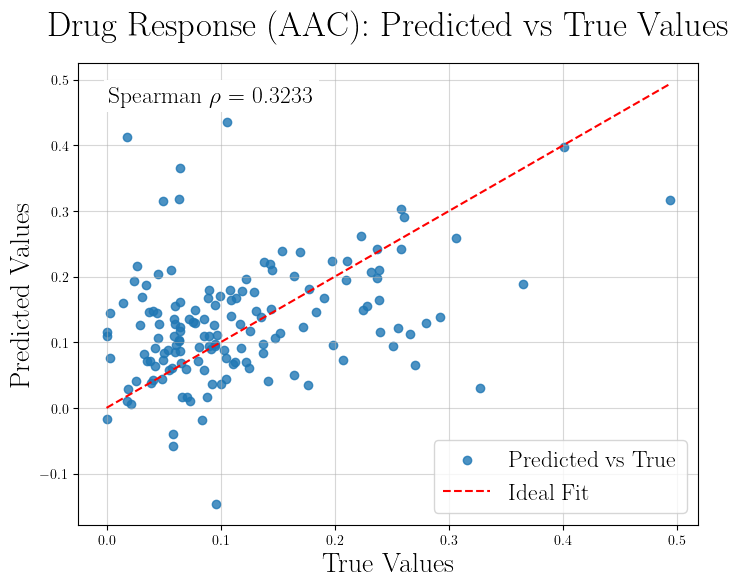

In [30]:
# Visualize predictions vs true values for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.8, label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.title('Drug Response (AAC): Predicted vs True Values', fontsize=25, pad=20)
plt.text(0.05, 0.95, f"Spearman $\\rho$ = {spearman_corr:.4f}", 
         transform=plt.gca().transAxes, fontsize=17, 
         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none'))
plt.legend(fontsize=17)
plt.grid(alpha=0.5)
plt.show()

## 5. Prepare Submission for Competition

In [31]:
# Create a submissions folder
SUBMISSION_PATH = "submissions"
os.makedirs(SUBMISSION_PATH, exist_ok=True)

# Predict on the feature set for submission
y_submission = pipeline.predict(X_submission)

# Format predictions and save to csv
submission = pd.DataFrame({"sampleId": X_submission.index, "AAC": y_submission})
submission.to_csv(os.path.join(SUBMISSION_PATH, 'LinearRegression.csv'), index=False)

#### Achieved Spearman correlation on Kaggle: 0.26395

### Hyperparameter Finetuning 

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import shap

# Load datasets
train_data = pd.read_csv('data/train.csv', index_col='sampleId')
train_targets = pd.read_csv('data/train_targets.csv', index_col='sampleId')
test_data = pd.read_csv('data/test.csv', index_col='sampleId')

# Preprocessing
X = train_data.values
y = train_targets['AAC'].values
tissue_info = train_targets['tissue']  # Optional for stratified splits or additional analysis

# Train-Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)

# Feature selection
k_best = 500  # Select top 500 features
selector = SelectKBest(mutual_info_regression, k=k_best)
X_train = selector.fit_transform(X_train, y_train)
X_val = selector.transform(X_val)
test_data = selector.transform(test_data)

# Model training: Linear SVR
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_train = svr.predict(X_train)
y_pred_val = svr.predict(X_val)

# Evaluation
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
spearman_corr = spearmanr(y_val, y_pred_val)[0]

print(f"Train MSE: {train_mse:.5f}")
print(f"Validation MSE: {val_mse:.5f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

ValueError: Index sampleId invalid